In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Conduct exploratory data analysis with the goal of finding reasons in the data to exclude deals in comp regions (addressing the categorization of a deal to make it more intuitive and more robust).

In [2]:
# Metropolitan Regional Information Systems (MRIS) For DC Metro
df = pd.read_csv("../data/property_listings_dc.csv")
pd.set_option('display.max_columns', None)
df.head()

/Users/timhou/anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (9,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  property_id listing_number status_changed_on           created_at  \
0   1          1.0      FL7791475        2012-03-10  2013-03-22 03:26:29   
1   2          2.0      FL7791503        2012-03-10  2013-03-22 03:26:29   
2   3          3.0      FL7792458        2012-03-12  2013-03-22 03:26:29   
3   4          4.0      FL7792578        2012-03-12  2013-03-22 03:26:30   
4   5          5.0      MC7745091        2012-03-13  2013-03-22 03:26:30   

            updated_at    status   listed_on contracted_on off_market_on  \
0  2013-10-22 01:37:06  inactive  2012-03-10           NaN           NaN   
1  2013-03-22 05:39:56  inactive  2012-03-10           NaN           NaN   
2  2013-03-22 05:39:56  inactive  2012-03-12           NaN           NaN   
3  2013-03-22 05:39:56  inactive  2012-03-12           NaN           NaN   
4  2014-02-04 07:20:45  inactive  2011-12-26    2011-12-27           NaN   

      sold_on  list_price  sold_price  original_list_price  previous_price  \
0         NaN      216900         NaN             216900.0             NaN   
1         NaN      216900         NaN             216900.0             NaN   
2         NaN      179900         NaN             179900.0             NaN   
3         NaN      189900         NaN             189900.0             NaN   
4  2012-03-13     1389000   1389000.0            1389000.0             NaN   

   seller_concessions  above_grade_square_feet  total_square_feet  \
0                   0                   1897.0                NaN   
1                   0                   1579.0                NaN   
2                   0                   1385.0                NaN   
3                   0                   1579.0                NaN   
4                   0                      NaN                NaN   

   finished_square_feet  derived_basement_square_feet car_storage  car_spaces  \
0                1897.0                             0           G         2.0   
1                1579.0                             0           G         2.0   
2                1385.0                             0           G         2.0   
3                1579.0                             0           G         2.0   
4                   NaN                             0           G         2.0   

   garages  beds  baths  area         subdivision                street  \
0        2     3      3   NaN          EAGLE ROCK     2 FEATHERDALE CIR   
1        2     3      2   NaN          EAGLE ROCK     4 FEATHERDALE CIR   
2        2     3      2   NaN    MOUNTAIN SHADOWS  2 MOUNTAIN SHADOW LN   
3        2     3      2   NaN    MOUNTAIN SHADOWS  3 MOUNTAIN SHADOW LN   
4        2     6      6   NaN  ALTA VISTA TERRACE      5701 ANNISTON RD   

           city state      zip                                property_key  \
0  FAYETTEVILLE    PA  17222.0     2-featherdale-cir-fayetteville-pa-17222   
1  FAYETTEVILLE    PA  17222.0     4-featherdale-cir-fayetteville-pa-17222   
2  FAYETTEVILLE    PA  17222.0  2-mountain-shadow-ln-fayetteville-pa-17222   
3  FAYETTEVILLE    PA  17222.0  3-mountain-shadow-ln-fayetteville-pa-17222   
4      BETHESDA    MD  20817.0          5701-anniston-rd-bethesda-md-20817   

  externally_last_updated_at  photos  structural_style  property_type  \
0        2012-03-12 16:27:09       2       50000757534    10000001073   
1        2012-03-12 16:28:56       2       10000001229    10000001073   
2        2012-03-12 22:03:40       4       10000001229    10000001073   
3        2012-03-13 00:09:44       2       10000001229    10000001073   
4        2012-03-13 14:34:29       1       50000757525    10000001073   

   architecture  year_built  lot_size_square_feet  lot_size_acres  \
0           NaN        2012               17000.0             NaN   
1           NaN        2012               17000.0             NaN   
2           NaN        2012               13000.0             NaN   
3           NaN        2012               13000.0             NaN   
4           Na

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664487 entries, 0 to 664486
Data columns (total 72 columns):
id                              664487 non-null int64
property_id                     664407 non-null float64
listing_number                  664487 non-null object
status_changed_on               664487 non-null object
created_at                      664487 non-null object
updated_at                      664487 non-null object
status                          664487 non-null object
listed_on                       664487 non-null object
contracted_on                   445877 non-null object
off_market_on                   15 non-null object
sold_on                         446091 non-null object
list_price                      664487 non-null int64
sold_price                      423126 non-null float64
original_list_price             664474 non-null float64
previous_price                  0 non-null float64
seller_concessions              664487 non-null int64
above_grade_squar

### Price Brackets

    if price > 1000000
      {construction_cost: 80000, gold_profit: 180000, silver_profit: 100000, bronze_profit: 60000}
    elsif price > 750000
      {construction_cost: 70000, gold_profit: 155000,  silver_profit: 85000, bronze_profit: 50000}
    elsif price > 600000
      {construction_cost: 60000, gold_profit: 135000,  silver_profit: 75000, bronze_profit: 45000}
    elsif price > 500000
      {construction_cost: 50000, gold_profit: 115000,  silver_profit: 65000, bronze_profit: 35000}
    elsif price > 400000
      {construction_cost: 40000, gold_profit: 105000,  silver_profit: 65000, bronze_profit: 30000}
    elsif price > 300000
      {construction_cost: 35000, gold_profit: 90000,  silver_profit: 55000, bronze_profit: 25000}
    elsif price > 250000
      {construction_cost: 30000, gold_profit: 80000,  silver_profit: 50000, bronze_profit: 25000}
    elsif price > 200000
      {construction_cost: 25000, gold_profit: 70000,  silver_profit: 45000, bronze_profit: 20000}
    elsif price > 150000
      {construction_cost: 20000, gold_profit: 65000,  silver_profit: 45000, bronze_profit: 20000}
    elsif price > 100000
      {construction_cost: 20000, gold_profit: 55000,  silver_profit: 35000, bronze_profit: 15000}
    else
      {construction_cost: 15000, gold_profit: 45000,  silver_profit: 35000, bronze_profit: 15000}
    end

In [4]:
df['construction_cost'] = df['list_price'] / 10.

In [5]:
df['gold_profit'] = df['list_price'].apply(lambda x: 180000.0 if x > 1000000 else 0.0)
df['silver_profit'] = df['list_price'].apply(lambda x: 100000.0 if x > 1000000 else 0.0)
df['bronze_profit'] = df['list_price'].apply(lambda x: 60000.0 if x > 1000000 else 0.0)

In [6]:
profit_tiers = {
    750000: [155000,85000,50000],
    600000: [135000,75000,45000],
    500000: [115000,65000,35000],
    400000: [105000,65000,30000],
    300000: [90000,55000,25000],
    250000: [80000,50000,25000],
    200000: [70000,45000,20000],
    150000: [65000,45000,20000],
    100000: [55000,35000,15000],
    'low': [45000,35000,15000]
}

tiers = [1000000, 750000, 600000, 500000, 400000, 300000, 250000, 200000, 150000, 100000]
for i, ptier in enumerate(tiers):
    if ptier == 1000000:
        continue
    df.ix[(df['list_price'] > ptier) & (df['list_price'] < tiers[i-1]), 'gold_profit'] = profit_tiers[ptier][0]
    df.ix[(df['list_price'] > ptier) & (df['list_price'] < tiers[i-1]), 'silver_profit'] = profit_tiers[ptier][1]
    df.ix[(df['list_price'] > ptier) & (df['list_price'] < tiers[i-1]), 'bronze_profit'] = profit_tiers[ptier][2]
df.ix[(df['list_price'] < tiers[-1]), 'gold_profit'] = profit_tiers['low'][0]
df.ix[(df['list_price'] < tiers[-1]), 'silver_profit'] = profit_tiers['low'][1]
df.ix[(df['list_price'] < tiers[-1]), 'bronze_profit'] = profit_tiers['low'][2]

For example, a home currently listed at \$770,000 would have an estimated construction cost of $70,000.

In order to flag that property as a gold deal, we would need to find matching comps that would show evidence that we could make at least \$155,000 in profit.  To do so, we’d be looking at properties that were sold for at least \$995,000  (\$770k + \$70k + \$155k)

If we couldn’t find one of those, but found one that sold at \$925,000, then we’ve found a silver deal (\$770k + \$70k + \$85k)

In [7]:
df['gold_deal_threshold'] = df['list_price'] + df['construction_cost'] + df['gold_profit']
df['silver_deal_threshold'] = df['list_price'] + df['construction_cost'] + df['silver_profit']
df['bronze_deal_threshold'] = df['list_price'] + df['construction_cost'] + df['bronze_profit']

### Gold
    (
    Resold within the past year and price > gold target price
    OR
    Sold within the past 8 months and price > gold target price
    )
    AND
    (
    Square footage less than 2000 and within 30% of subject
    OR
    Square footage more than 2000 and within 20% of subject
    )
    AND
    (
    Subject has basement
    OR
    Subject has no basement and comp has no basement
    )
    AND
    (
    Subject and Comp have the same structural style
    )
    AND
    (
    Subject and Comp have the same number of stories
    )

### Silver
    (
    Resold within the past year and price > silver target price
    OR
    Resold more than a year ago and price > gold target price
    OR
    Sold within the past 8 months and price > silver target price
    )
    AND
    (
    Square footage less than 2000 and within 30% of subject
    OR
    Square footage more than 2000 and within 20% of subject
    )
    AND
    (
    Subject has basement
    OR
    Subject has no basement and comp has no basement
    )

### Bronze
    (
    Resold more than a year ago and price > silver target price
    OR
    Sold within the past 8 months and price > bronze target price
    )
    AND
    (
    Square footage less than 2000 and within 30% of subject
    OR
    Square footage more than 2000 and within 20% of subject
    )
    AND
    (
    Subject has basement
    OR
    Subject has no basement and comp has no basement
    )

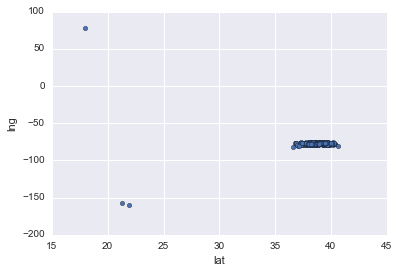

In [8]:
df.query("list_price >= 1000000")[['lat','lng']].plot(x='lat', y='lng', kind='scatter');

In [9]:
test = df.query("list_price == 1000000")[['lat','lng']]
test['lat'].iloc[0]

39.108559999999997

In [10]:
import bokeh
bokeh.__version__

'0.11.1'

In [11]:
from bokeh.io import output_notebook, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
output_notebook()

Loading BokehJS ...

In [12]:
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, 
    Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

map_options = GMapOptions(lat=test['lat'].iloc[0]+1.3, lng=test['lng'].iloc[0]-2.0, map_type="roadmap", zoom=7)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), 
    map_options=map_options, title="Austin"
)

source = ColumnDataSource(
    data=dict(
        lat=test['lat'],
        lon=test['lng'],
    )
)

circle = Circle(x="lon", y="lat", size=5, 
                fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())

In [13]:
show(plot)

In [14]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['sold_on'] = pd.to_datetime(df['sold_on'], errors='coerce')
df['listed_on'] = pd.to_datetime(df['listed_on'])

In [15]:
df['sold_time'] = df['sold_on'] - df['listed_on']
df['sold_time_month'] = df['sold_time'] / np.timedelta64(1, 'M')

In [16]:
active_2016 = df[(df['created_at'].dt.year == 2016) & 
                 (df['status'] == 'active') & 
                 (df['list_price'] > 1000000)]

In [17]:
deal = active_2016.iloc[0]

In [18]:
(test['lat'].iloc[0]+1.3,test['lng'].iloc[0]-2.0)

(40.408559999999994, -79.492689999999996)

In [19]:
test2 = df[(df['gold_deal_threshold'] > deal['gold_deal_threshold'])][['lat','lng']]

map_options = GMapOptions(lat=test['lat'].iloc[0]+1.3, lng=test['lng'].iloc[0]-2.0, map_type="roadmap", zoom=7)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), 
    map_options=map_options, title="Austin"
)

source = ColumnDataSource(
    data=dict(
        lat=test['lat'],
        lon=test['lng'],
    )
)

circle = Circle(x="lon", y="lat", size=5, 
                fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())

show(plot)

In [20]:
df[(df['gold_deal_threshold'] > deal['gold_deal_threshold']) &
  (df['above_grade_square_feet'] > deal['above_grade_square_feet'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4138 entries, 130 to 664180
Data columns (total 81 columns):
id                              4138 non-null int64
property_id                     4136 non-null float64
listing_number                  4138 non-null object
status_changed_on               4138 non-null object
created_at                      4138 non-null datetime64[ns]
updated_at                      4138 non-null object
status                          4138 non-null object
listed_on                       4138 non-null datetime64[ns]
contracted_on                   1582 non-null object
off_market_on                   1 non-null object
sold_on                         1554 non-null datetime64[ns]
list_price                      4138 non-null int64
sold_price                      1475 non-null float64
original_list_price             4138 non-null float64
previous_price                  0 non-null float64
seller_concessions              4138 non-null int64
above_grade_square_fee

In [21]:
df['above_grade_square_feet']

0         1897.0
1         1579.0
2         1385.0
3         1579.0
4            NaN
5         3670.0
6         5828.0
7         1126.0
8         1144.0
9         1359.0
10        2899.0
11         945.0
12        1884.0
13        1822.0
14        2012.0
15         936.0
16        2116.0
17        1800.0
18        1928.0
19         750.0
20        4384.0
21        2303.0
22        1620.0
23        1440.0
24        2036.0
25        2864.0
26        3616.0
27        1584.0
28        1304.0
29        1083.0
           ...  
664457    1264.0
664458    1223.0
664459       0.0
664460    2640.0
664461    1755.0
664462    1098.0
664463    3288.0
664464       0.0
664465    2016.0
664466     999.0
664467    2842.0
664468    3372.0
664469    2509.0
664470     696.0
664471     861.0
664472    1500.0
664473    2887.0
664474    3175.0
664475    1216.0
664476    1088.0
664477     590.0
664478    2334.0
664479    1033.0
664480    1585.0
664481    2760.0
664482    1124.0
664483    2526.0
664484    1448

In [22]:
deal['above_grade_square_feet']

2135.0

In [23]:
(2135.0 - 1897.0) / (2135.0 + 1897.0)

0.059027777777777776

In [24]:
deal.ix[['basement_finished_status',
 'basement_finished_pct',
 'basement_square_feet',
 'basement_size',
 'basement_type']]

basement_finished_status                          NaN
basement_finished_pct                              83
basement_square_feet                              598
basement_size                                     712
basement_type               10000734253,10000001730,1
Name: 616255, dtype: object

In [25]:
df[['basement_finished_status',
 'basement_finished_pct',
 'basement_square_feet',
 'basement_size',
 'basement_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664487 entries, 0 to 664486
Data columns (total 5 columns):
basement_finished_status    15470 non-null float64
basement_finished_pct       180994 non-null float64
basement_square_feet        615502 non-null float64
basement_size               664487 non-null int64
basement_type               515360 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 25.3+ MB


In [26]:
df[['stories']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664487 entries, 0 to 664486
Data columns (total 1 columns):
stories    0 non-null float64
dtypes: float64(1)
memory usage: 5.1 MB


In [27]:
print df[['structural_style']].head()

   structural_style
0       50000757534
1       10000001229
2       10000001229
3       10000001229
4       50000757525


In [28]:
style = """
10000001209, A-Frame
10000001210, Art Deco
50000757525, Arts & Crafts
10000001211, Beaux Arts
10000001212, Bilevel 
10000001213, Bungalow
50000757526, Cabin
10000001214, Cape Cod
50000757528, Carriage House
10000001215, Chalet
10000001216, Colonial
10000001217, Contemporary
10000001218, Cottage Cottage 
50000757527, Craftsman
10000001219, Dome
50000925670, Dutch Colonial
10000001220, Farm House
10000001221, Federal 
50000757530, French Country
50000757529, French Provincial
10000001222, International
10000001223, Log Home
50000757531, Manor
10000001224, Other
50074309714, Post & Beam
50000757532, Prairie Prairie 
10000001225, Provincial
10000001226, Raised
10000001227, Raised
10000001228, Rambler
10000001229, Rancher 
50000757533, Salt Box
10000001230, Spanish 
10000001231, Split Foyer
10000001232, Split Level
50000757534, Traditional
50000757535, Transitional
10000001233, Tudor
10000001234, Victorian
50000757536, Villa
50038639399, Farmhouse/National Folk
50048764643, Georgian"""

In [29]:
styles = {int(s.split(',')[0]):s.split(',')[1].strip() for s in style.split('\n')[1:]}
styles

{10000001209: 'A-Frame',
 10000001210: 'Art Deco',
 10000001211: 'Beaux Arts',
 10000001212: 'Bilevel',
 10000001213: 'Bungalow',
 10000001214: 'Cape Cod',
 10000001215: 'Chalet',
 10000001216: 'Colonial',
 10000001217: 'Contemporary',
 10000001218: 'Cottage Cottage',
 10000001219: 'Dome',
 10000001220: 'Farm House',
 10000001221: 'Federal',
 10000001222: 'International',
 10000001223: 'Log Home',
 10000001224: 'Other',
 10000001225: 'Provincial',
 10000001226: 'Raised',
 10000001227: 'Raised',
 10000001228: 'Rambler',
 10000001229: 'Rancher',
 10000001230: 'Spanish',
 10000001231: 'Split Foyer',
 10000001232: 'Split Level',
 10000001233: 'Tudor',
 10000001234: 'Victorian',
 50000757525: 'Arts & Crafts',
 50000757526: 'Cabin',
 50000757527: 'Craftsman',
 50000757528: 'Carriage House',
 50000757529: 'French Provincial',
 50000757530: 'French Country',
 50000757531: 'Manor',
 50000757532: 'Prairie Prairie',
 50000757533: 'Salt Box',
 50000757534: 'Traditional',
 50000757535: 'Transitiona

In [30]:
mystyles = df['structural_style'].apply(lambda x: styles[x] if x in styles else x).unique()
# set([style for style in mystyles if type(style).__name__ == 'int64'])

In [31]:
df['structural_names'] = df['structural_style'].apply(lambda x: styles[x] if x in styles else x)
df['structural_names'].head()

0      Traditional
1          Rancher
2          Rancher
3          Rancher
4    Arts & Crafts
Name: structural_names, dtype: object

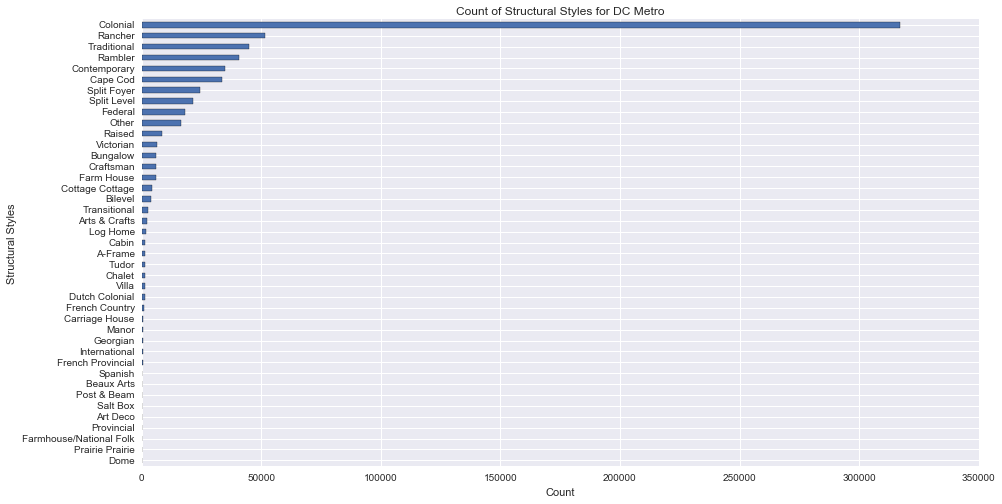

In [32]:
s = df['structural_names'].value_counts()
pd.DataFrame(s).reset_index().sort_values('structural_names',
                                          ascending=True).plot(x='index',
                                                               y='structural_names',kind='barh', figsize=(15,8))
plt.legend("")
plt.ylabel("Structural Styles")
plt.xlabel("Count")
plt.title("Count of Structural Styles for DC Metro");